### Importing Libraries

In [348]:
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import linear_model
%matplotlib inline 

### Loading Training Dataset

In [278]:
ad_train = pd.read_csv("ad_org_train.csv")

In [422]:
(ad_train.shape)

(14637, 9)

In [279]:
ad_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [280]:
ad_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14999 non-null object
adview       14999 non-null int64
views        14999 non-null object
likes        14999 non-null object
dislikes     14999 non-null object
comment      14999 non-null object
published    14999 non-null object
duration     14999 non-null object
category     14999 non-null object
dtypes: int64(1), object(8)
memory usage: 585.9+ KB


In [419]:
ad_train.describe()

,adview,views,likes,dislikes,comment,duration
count,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637
mean,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,0 days 00:17:20.179066
std,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,0 days 00:38:36.818747
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0 days 00:00:00
25%,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,0 days 00:03:07
50%,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,0 days 00:05:25
75%,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,0 days 00:12:03
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,0 days 11:45:17


### Checking for Duplicate values 

In [420]:
ad_train.duplicated().sum()

0

### Checking for missing values

In [283]:
print(ad_train.isnull().sum())

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64


### Let's take a look at the datatypes of variables

In [284]:
ad_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

#### Changing datatype of Published Column which should be in datetime format

In [285]:
ad_train['published'] = pd.to_datetime(ad_train.published)
ad_train.dtypes

vidid                object
adview                int64
views                object
likes                object
dislikes             object
comment              object
published    datetime64[ns]
duration             object
category             object
dtype: object

#### Cleaning duration column(removing 'PT' from it) and chnging the datatype in appropriate format

In [286]:
ad_train['duration'] = ad_train.duration.str.replace('P','')

In [287]:
ad_train['duration'] = ad_train.duration.str.replace('T','')

In [288]:
ad_train['duration'] = pd.to_timedelta(ad_train['duration'])
                                   

In [424]:
## Let's look at the datatype again
ad_train.dtypes

vidid                 object
adview                 int64
views                  int32
likes                  int32
dislikes               int32
comment                int32
published     datetime64[ns]
duration     timedelta64[ns]
category              object
dtype: object

#### I found that there is no missing values in dataset but I found there is 'F' values in some columns which doesn't make any sense because all these column is a continuous. So' I remove all those rows with value 'F' and change their datatypes.

### View

In [291]:
print(ad_train.views.str.contains('F').sum())

2


In [292]:
ad_train.loc[ad_train['views'] == 'F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
7447,VID_9269,1,F,0,1,0,2013-10-03,00:21:28,D
8112,VID_9262,1,F,1,0,0,2013-09-18,00:21:06,D


In [293]:
ad_train = ad_train[ad_train.views != 'F']

In [294]:
ad_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,00:07:37,F
1,VID_14135,2,1707,56,2,6,2016-10-01,00:09:30,D
2,VID_2187,1,2023,25,0,2,2016-07-02,00:02:16,C
3,VID_23096,6,620860,777,161,153,2016-07-27,00:04:22,H
4,VID_10175,1,666,1,0,0,2016-06-29,00:00:31,D


In [295]:
ad_train['views'] = ad_train.views.astype(int)

### Likes

In [296]:
ad_train = ad_train[ad_train.likes != 'F']

In [297]:
ad_train['likes'] = ad_train.likes.astype(int)

### Dislikes

In [298]:
ad_train = ad_train[ad_train.dislikes != 'F']

In [299]:
ad_train['dislikes'] = ad_train.dislikes.astype(int)

### Comment

In [300]:
ad_train = ad_train[ad_train.comment != 'F']

In [301]:
ad_train['comment'] = ad_train.comment.astype(int)

#### Now again look at the shape of the training data

In [302]:
ad_train.shape

(14637, 9)

#### Datatypes

In [303]:
ad_train.dtypes

vidid                 object
adview                 int64
views                  int32
likes                  int32
dislikes               int32
comment                int32
published     datetime64[ns]
duration     timedelta64[ns]
category              object
dtype: object

In [315]:
from pandas.plotting import scatter_matrix

c:\users\akash tiwari\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


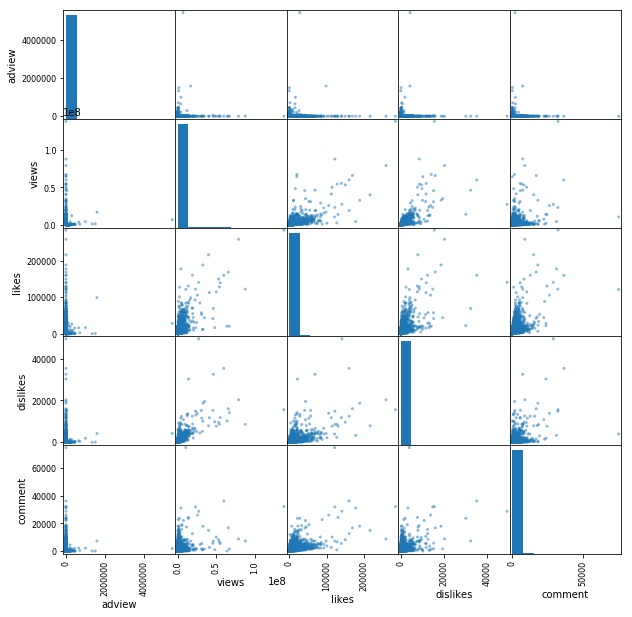

In [319]:
scatter_matrix = pd.scatter_matrix(ad_train, figsize  = [10, 10])
plt.show()

## Category##

In [337]:
count = ad_train.category.value_counts(ascending = False)
#printing top 5 values
count.head()

D    7383
G    2473
E    1597
B     970
F     879
Name: category, dtype: int64

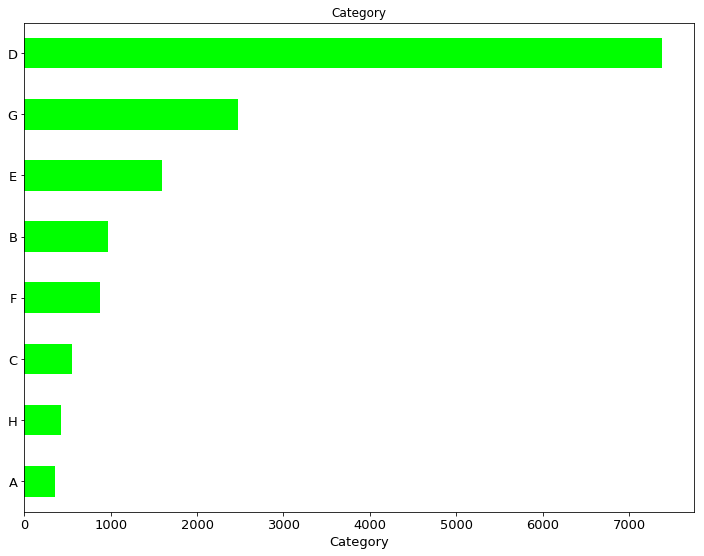

In [338]:
#catrgory_plt = ad_train.hist(column='category')
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Category')

# on x axis
lt.set_xlabel('Category', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

## Duration##

In [341]:
def profit_avg(column):
    return ad_train[column].mean()

In [459]:
print(profit_avg('duration'))

0 days 00:17:20.179066


## Correlation##

In [457]:
keep_columns = ['views','likes','dislikes','comment']
corr_matrix = ad_train[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment
views,1.000000,0.726716,0.730320,0.410662
likes,0.726716,1.000000,0.648876,0.651202
dislikes,0.730320,0.648876,1.000000,0.532548
comment,0.410662,0.651202,0.532548,1.000000


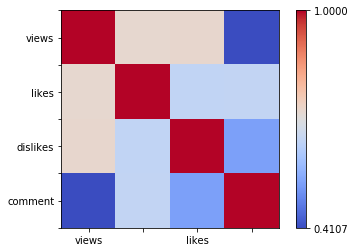

In [458]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

### Loading Test Dataset

In [441]:
ad_test = pd.read_csv("ad_org_test.csv")

In [442]:
ad_test.shape

(8764, 8)

In [443]:
ad_test =ad_test[ad_test.views != 'F']
ad_test['views'] = ad_test.views.astype(int)

In [444]:
ad_test.dtypes

vidid        object
views         int32
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

## Linear Regression##

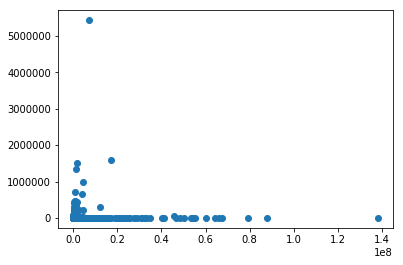

In [445]:
plt.scatter(ad_train.views, ad_train.adview)

In [446]:
reg = linear_model.LinearRegression()
reg.fit(ad_train[['views']], ad_train.adview)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [447]:
reg.predict([[43118]])

array([1642.12590346])

In [448]:
adview = reg.predict(ad_test[['views']])

In [449]:
ad_test['adview'] = adview

In [450]:
ad_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category,adview
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B,1894.091418
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F,2274.713398
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D,1632.872617
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G,2450.200349
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B,2815.952607


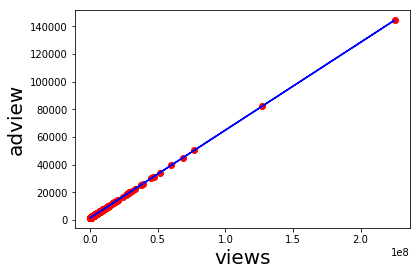

In [451]:
plt.xlabel('views', fontsize = 20)
plt.ylabel('adview', fontsize = 20)
plt.scatter(ad_test.views, ad_test.adview, color='red')
plt.plot(ad_test.views, reg.predict(ad_test[['views']]), color = 'blue')

In [453]:
ad_test.to_csv("prediction.csv")